## Question 1	 [20 points]

Only plot required

Create a **pie chart** which shows the proportion of male/female passengers.

In [1]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv")
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


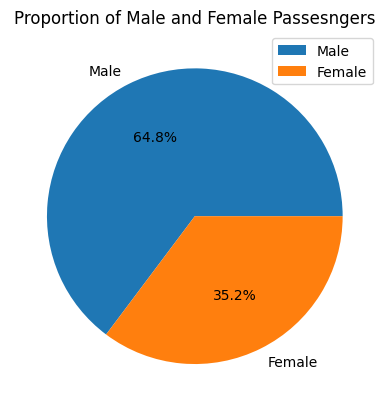

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# count the number of males and females
male_count = df['sex'].value_counts()['male']
female_count = df['sex'].value_counts()['female']

# create a list of counts and labels
counts = np.array([male_count, female_count])
labels = ['Male','Female']

# create a pie chart and display
plt.pie(counts,labels = labels, autopct = '%1.1f%%')
plt.title('Proportion of Male and Female Passesngers')
plt.legend(loc = 'upper right')

plt.show()

## Question 2	 [20 points]

Only plot required

Create a **pie chart** which shows the proportion of passengers in each class (1, 2, 3). 

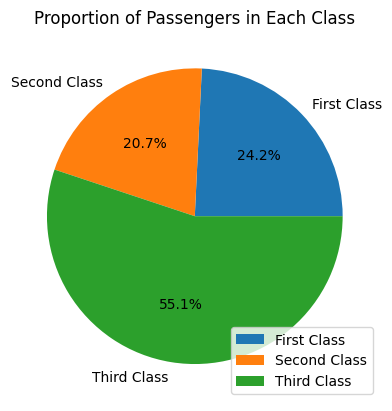

In [10]:
first_class = df['pclass'].value_counts()[1]
second_class = df['pclass'].value_counts()[2]
third_class = df['pclass'].value_counts()[3]

counts = np.array([first_class, second_class, third_class])
labels = ['First Class', 'Second Class', 'Third Class']

plt.pie(counts, labels = labels, autopct = "%1.1f%%")
plt.title("Proportion of Passengers in Each Class")
plt.legend(loc = 'lower right')

plt.show()

## Question 3	 [20 points]

Plot and interpretation required

Explain **the relationship between age and fare** using a visualisation. 

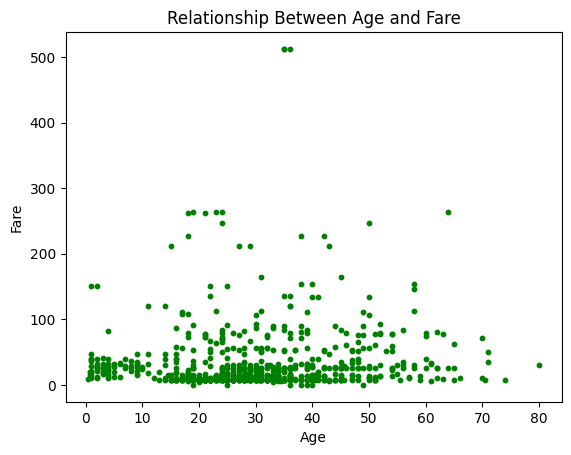

"\nIn this scatter plot, the x-axis represnets the age values, \nand the y-axis represents the the fare values.\nEach point on the plot represents a passenger's age and corresponding\nfare they paid, thus the whole plot helps visualise the distribution and\nrelationship between these two values. \n\n\n\n"

In [28]:
# data cleasing
df_cleaned = df.dropna(subset=['age','fare'])


# plotting
plt.scatter(df_cleaned['age'], df_cleaned['fare'], color = 'green', s=10)
plt.title('Relationship Between Age and Fare')
plt.xlabel('Age')
plt.ylabel('Fare')

plt.show()

'''In this scatter plot, the x-axis represnets the age values, 
and the y-axis represents the the fare values.
Each point on the plot represents a passenger's age and corresponding
fare they paid, thus the whole plot helps visualise the distribution and
relationship between these two values. 

The scattered distribution of points indicates that there is no consistent
pattern or trend in the relationship between age and fare. It suggests that 
factors other than age may have a more significant impact on the fare values. 

In addition, the majority of fare values are less than 300 with a large 
proportion indicates that the majority of passengers paid relatively low fares. 
This could be due to various reasons such as ticket class.'''

In [31]:
df_cleaned['fare'].mean()

34.694514005602244

## Question 4	 [40 points]

Plot and interpretation required

What is the **survival ratio** by age, sex, and class. 

<ipython-input-37-565d97134f90>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['age_group'] = age_groups


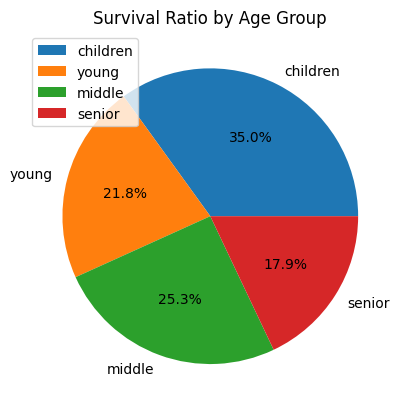

In [37]:
new_df = df.dropna(subset = ['age','sex','pclass'])
# 1. by age
# create age groups
bins = [0,14,30,55,80]
labels = ['children','young','middle','senior']
age_groups = pd.cut(new_df['age'], bins, labels = labels)
new_df['age_group'] = age_groups

# Group the data by age and calculate the survival ratio
survival_ratio = new_df.groupby(['age_group'])['survived'].mean()

children_survival = survival_ratio['children']
young_survival = survival_ratio['young']
middle_survival = survival_ratio['middle']
senior_survival = survival_ratio['senior']

survival_ratio_age = np.array([children_survival, young_survival, middle_survival, senior_survival])

plt.pie(survival_ratio_age, labels = labels, autopct = '%1.1f%%')
plt.title('Survival Ratio by Age Group')
plt.legend(loc = 'upper left')
plt.show()

*   Children (0-14 years): The survival rate for children is relatively high at 35%. This suggests that children had a higher chance of survival during the Titanic disaster.
*   Young (15-30 years): The survival rate for young passengers is 21.8%, indicating that a lower proportion of young individuals survived compared to children.
*   Middle (31-55 years): Passengers in the middle age group have a survival rate of 25.3%, suggesting a moderate chance of survival.
*   Seniors (above 56 years): The survival rate for seniors is relatively low at 17.9%, indicating that a smaller proportion of elderly passengers survived.

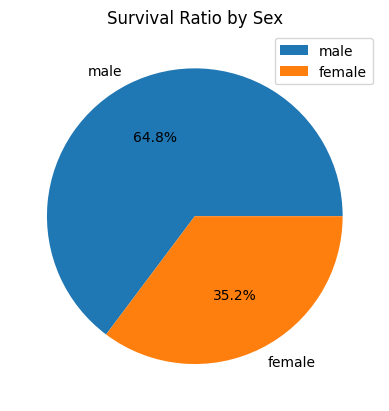

In [39]:
# by sex
survival_ratio = new_df.groupby(['sex'])['survived'].mean()

male_survival = survival_ratio['male']
female_survival = survival_ratio['female']

survival_ratio_sex = np.array([male_count, female_count])

plt.pie(survival_ratio_sex, labels = ['male','female'],autopct = '%1.1f%%')
plt.title('Survival Ratio by Sex')
plt.legend()
plt.show()


*   Male: The survival rate for males is 64.8%, implying that a majority of males did not survive the Titanic disaster.

*   Female: The survival rate for females is 35.2%, indicating that a higher proportion of females survived compared to males. This suggests a prioritization of saving women during the rescue efforts.

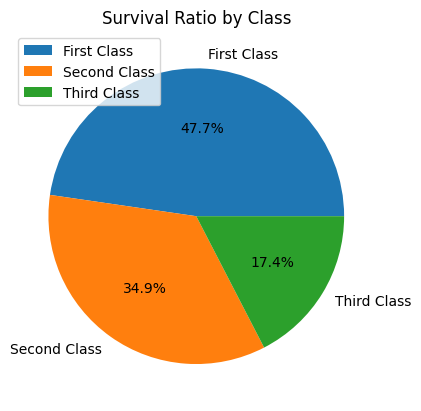

In [41]:
# by class
survival_ratio = new_df.groupby(['pclass'])['survived'].mean()

first_class_survival = survival_ratio[1]
second_class_survival = survival_ratio[2]
third_class_survival = survival_ratio[3]

survival_ratio_sex = np.array([first_class_survival, second_class_survival, third_class_survival])

plt.pie(survival_ratio_sex, labels = ['First Class','Second Class', 'Third Class'],autopct = '%1.1f%%')
plt.title('Survival Ratio by Class')
plt.legend(loc = 'upper left')
plt.show()

*  First Class: Passengers in the first class had the highest survival rate at 47.7%, indicating a better chance of survival for those in higher social classes.
*  Second Class: The survival rate for second-class passengers is 34.9%, which is lower than first class but higher than third class.
*  Third Class: Passengers in the third class had the lowest survival rate at 17.4%, implying that individuals in lower classes faced greater challenges in surviving the disaster.